## This notebook creates the zone panels used in Figure 1.
There is a panel for each zone. The panels show the proportions of fish sampled each year. There is a bar plot for each of farm and wild.

In [149]:
import pandas as pd
import seaborn as sns
from pathlib import Path

In [150]:
# define the paths
DATA_DIR = Path('..') / 'source_data'

wild_fish_filepath = DATA_DIR / 'all_wild_fish_lice.csv'
wild_events_filepath = DATA_DIR / 'all_wild_sample_events.csv'

farm_details_filepath = DATA_DIR / 'industry_farm_details.csv'
farm_events_filepath = DATA_DIR / 'industry_farm_abundance.csv'

chart_output_dirpath = Path('..') / 'output' / 'Figure_1'

# Get a dataframe in the right format
1. There is a chart for each zone, so we need a zone column
2. Farm and wild are separated, so there needs to be a type column ('farm' or 'wild')
3. The x-axis is year, so we need a year column
4. Y-axis is that year's proportion of the total data, so we need:
    * the total events for each zone for each of farm and wild
    * number of events for each year, zone, farm|wild

## Get farm data in the right format

In [151]:
farm_details_df = pd.read_csv(farm_details_filepath)
farm_events_df = pd.read_csv(farm_events_filepath)
farm_df = pd.merge(farm_details_df, farm_events_df, on='facility_id', how='left')

# make sure we only use 2004 - 2023
farm_df = farm_df[farm_df.year.isin(range(2004, 2024))]

farm_df.head()

,facility_id,name,dfozone,latitude,longitude,company,region_name,year,month,fish_selected,chalimus_ab,lep_motile_ab,lep_af_ab,cal_motile_ab,weight
0,1,Ahlstrom,3_1,49.778527,-124.154337,Grieg,Jervis and Sechelt Inlet,2009,5,120,0.0000,0.0167,0.0083,0.0000,1.0000
1,1,Ahlstrom,3_1,49.778527,-124.154337,Grieg,Jervis and Sechelt Inlet,2009,6,40,0.0000,0.0000,0.0000,0.0000,0.4793
2,1,Ahlstrom,3_1,49.778527,-124.154337,Grieg,Jervis and Sechelt Inlet,2010,11,60,0.0167,0.5333,0.1833,0.0167,0.4773
3,1,Ahlstrom,3_1,49.778527,-124.154337,Grieg,Jervis and Sechelt Inlet,2010,12,62,0.0161,0.6290,0.3065,0.0000,0.3300
4,1,Ahlstrom,3_1,49.778527,-124.154337,Grieg,Jervis and Sechelt Inlet,2011,1,60,0.0000,1.0333,0.4167,0.0000,0.2320


In [152]:
# group by zone/year and get the number of sampling events
farm_zone_year_group = farm_df.groupby(['dfozone', 'year'])
farm_zone_year_event_df = farm_zone_year_group['fish_selected'].agg('count').reset_index()
farm_zone_year_event_df.head()

,dfozone,year,fish_selected
0,2_3,2004,8
1,2_3,2005,58
2,2_3,2006,67
3,2_3,2007,85
4,2_3,2008,61


In [153]:
# get the number of sampling events for each zone over all years
total_event_group = farm_zone_year_event_df.groupby(['dfozone'])
total_event_df = total_event_group['fish_selected'].agg('sum').reset_index()
total_event_df.rename(columns={'fish_selected': 'total'}, inplace=True)
total_event_df.head()

,dfozone,total
0,2_3,1661
1,2_4,1583
2,3_1,562
3,3_2,1819
4,3_3,2777


In [154]:
# merge together and create a proportion column
farm_chart_df = pd.merge(farm_zone_year_event_df, total_event_df, on='dfozone', how='left')
farm_chart_df['proportion'] = farm_chart_df.fish_selected / farm_chart_df.total
farm_chart_df.head()

,dfozone,year,fish_selected,total,proportion
0,2_3,2004,8,1661,0.004816
1,2_3,2005,58,1661,0.034919
2,2_3,2006,67,1661,0.040337
3,2_3,2007,85,1661,0.051174
4,2_3,2008,61,1661,0.036725


In [155]:
# label as farm
farm_chart_df['type'] = 'Farm Events'
# reindex to be in the right format for charting
farm_chart_df = farm_chart_df.reindex(columns=['dfozone', 'year', 'proportion', 'type', 'total'])
farm_chart_df.head()

,dfozone,year,proportion,type,total
0,2_3,2004,0.004816,Farm Events,1661
1,2_3,2005,0.034919,Farm Events,1661
2,2_3,2006,0.040337,Farm Events,1661
3,2_3,2007,0.051174,Farm Events,1661
4,2_3,2008,0.036725,Farm Events,1661


## Get wild data in the right format

In [156]:
wild_events_df = pd.read_csv(wild_events_filepath)
wild_events_df['event_id'] = wild_events_df['event_id'].astype(str)
wild_events_df.head()

,event_id,sampledate,region,dfozone,sample_site,latitude,longitude,source,source_code
0,1,2003-05-13,Broughton Archipelago,3_3,Adeane Point,50.71978,-125.67950,Fisheries and Oceans Canada,DFO
1,2,2003-05-21,Broughton Archipelago,3_3,Adeane Point,50.71978,-125.67950,Fisheries and Oceans Canada,DFO
2,3,2003-05-26,Broughton Archipelago,3_3,Adeane Point,50.7197,-125.67950,Fisheries and Oceans Canada,DFO
3,4,2003-06-02,Broughton Archipelago,3_3,Adeane Point,50.7197,-125.67950,Fisheries and Oceans Canada,DFO
4,5,2003-05-13,Broughton Archipelago,3_3,Adeane Point,50.7384,-125.67985,Fisheries and Oceans Canada,DFO


In [157]:

wild_fish_df = pd.read_csv(wild_fish_filepath)
wild_fish_df['event_id'] = wild_fish_df['event_id'].astype(str)

wild_df = pd.merge(wild_events_df, wild_fish_df, on='event_id', how='right')
wild_df['sampledate'] = pd.to_datetime(wild_df['sampledate'], errors='coerce', utc=True)
wild_df.head()

/tmp/ipykernel_823573/3797219986.py:1: DtypeWarning: Columns (0,1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  wild_fish_df = pd.read_csv(wild_fish_filepath)


,event_id,sampledate,region,dfozone,sample_site,latitude,longitude,source,source_code,fish_id,...,lep_unknown,cal_cop,cal_chal,cal_motile,cal_unknown,unknown_cop,unknown_chal,unknown_motile,unknown_unknown,lice_protocol
0,5666,2017-05-15 00:00:00+00:00,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,MBC,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lethal
1,5666,2017-05-15 00:00:00+00:00,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,MBC,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Lethal
2,5666,2017-05-15 00:00:00+00:00,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,MBC,3,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Lethal
3,5666,2017-05-15 00:00:00+00:00,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,MBC,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lethal
4,5666,2017-05-15 00:00:00+00:00,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,MBC,5,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,Lethal


In [158]:
# make a year column
wild_df['year'] = wild_df.sampledate.dt.year

# make sure we only use 2004 - 2023
wild_df = wild_df[wild_df.year.isin(range(2004, 2024))]

In [159]:
# group by zone/year and count the fish sampled
wild_zone_year_group = wild_df.groupby(['dfozone', 'year'])
wild_zone_year_fish_df = wild_zone_year_group['fish_id'].agg('count').reset_index()
wild_zone_year_fish_df.head()

,dfozone,year,fish_id
0,2_3,2004.0,2412
1,2_3,2005.0,1312
2,2_3,2006.0,1557
3,2_3,2007.0,1176
4,2_3,2008.0,2198


In [160]:
# get the total fish per zone over all years
wild_total_fish_group = wild_zone_year_fish_df.groupby(['dfozone'])
wild_total_fish_df = wild_total_fish_group['fish_id'].agg('sum').reset_index()
wild_total_fish_df.rename(columns={'fish_id': 'total'}, inplace=True)
wild_total_fish_df.head()

,dfozone,total
0,2_3,25253
1,2_4,37596
2,3_1,6640
3,3_2,17963
4,3_3,212334


In [161]:
# merge together and create a proportion column
wild_chart_df = pd.merge(wild_zone_year_fish_df, wild_total_fish_df, on='dfozone', how='left')
wild_chart_df['proportion'] = wild_chart_df.fish_id / wild_chart_df.total
wild_chart_df.head()

,dfozone,year,fish_id,total,proportion
0,2_3,2004.0,2412,25253,0.095513
1,2_3,2005.0,1312,25253,0.051954
2,2_3,2006.0,1557,25253,0.061656
3,2_3,2007.0,1176,25253,0.046569
4,2_3,2008.0,2198,25253,0.087039


In [162]:
# label as farm
wild_chart_df['type'] = 'Wild Fish'
# reindex to be in the right format for charting
wild_chart_df = wild_chart_df.reindex(columns=['dfozone', 'year', 'proportion', 'type', 'total'])
wild_chart_df.head()

,dfozone,year,proportion,type,total
0,2_3,2004.0,0.095513,Wild Fish,25253
1,2_3,2005.0,0.051954,Wild Fish,25253
2,2_3,2006.0,0.061656,Wild Fish,25253
3,2_3,2007.0,0.046569,Wild Fish,25253
4,2_3,2008.0,0.087039,Wild Fish,25253


## Combine the Dataframes ready for charting

In [163]:
chart_df = pd.concat([farm_chart_df, wild_chart_df])

chart_df.head()

,dfozone,year,proportion,type,total
0,2_3,2004.0,0.004816,Farm Events,1661
1,2_3,2005.0,0.034919,Farm Events,1661
2,2_3,2006.0,0.040337,Farm Events,1661
3,2_3,2007.0,0.051174,Farm Events,1661
4,2_3,2008.0,0.036725,Farm Events,1661


# Create charts for each zone

In [164]:
# slightly hacky solution to get nice titles in the charts - adjust type column to include the total N
chart_df.type = chart_df.apply(lambda x: "{} (N={:,})".format(x.type, x.total), axis=1)
chart_df.head()

,dfozone,year,proportion,type,total
0,2_3,2004.0,0.004816,"Farm Events (N=1,661)",1661
1,2_3,2005.0,0.034919,"Farm Events (N=1,661)",1661
2,2_3,2006.0,0.040337,"Farm Events (N=1,661)",1661
3,2_3,2007.0,0.051174,"Farm Events (N=1,661)",1661
4,2_3,2008.0,0.036725,"Farm Events (N=1,661)",1661


In [165]:
# configure seaborn
sns.set_style('whitegrid')
sns.set(rc={"figure.figsize": (15, 15)})
sns.set_context("paper")
sns.set_palette('colorblind')

sns.set(font_scale=1.4)

In [166]:
def chart_zone(zone_str):
    chart_zone_df = chart_df[chart_df.dfozone == zone_str]

    # FacetGrid
    facet_grid = sns.FacetGrid(chart_zone_df, row='type', aspect=3, height=2, hue='type', palette='gray', sharey=False)
    facet_grid.map(sns.barplot, 'year', 'proportion', order=list(range(2004, 2024)))

    facet_grid.set(xticks=[1, 6, 11, 16], yticks=[0, 0.1])
    facet_grid.set_axis_labels(x_var="", y_var="")

    facet_grid.set_titles("{row_name}")

    # set the y-axis for the farm charts
    print(facet_grid.axes_dict)
    for ax_name, ax in facet_grid.axes_dict.items():
        if ax_name.startswith('Farm'):
            ax.set_ylim((0, .18))

    return facet_grid

{'Farm Events (N=1,661)': <AxesSubplot:title={'center':'Farm Events (N=1,661)'}>, 'Wild Fish (N=25,253)': <AxesSubplot:title={'center':'Wild Fish (N=25,253)'}>}
{'Farm Events (N=1,583)': <AxesSubplot:title={'center':'Farm Events (N=1,583)'}>, 'Wild Fish (N=37,596)': <AxesSubplot:title={'center':'Wild Fish (N=37,596)'}>}
{'Farm Events (N=562)': <AxesSubplot:title={'center':'Farm Events (N=562)'}>, 'Wild Fish (N=6,640)': <AxesSubplot:title={'center':'Wild Fish (N=6,640)'}>}
{'Farm Events (N=1,819)': <AxesSubplot:title={'center':'Farm Events (N=1,819)'}>, 'Wild Fish (N=17,963)': <AxesSubplot:title={'center':'Wild Fish (N=17,963)'}>}
{'Farm Events (N=2,777)': <AxesSubplot:title={'center':'Farm Events (N=2,777)'}>, 'Wild Fish (N=212,334)': <AxesSubplot:title={'center':'Wild Fish (N=212,334)'}>}
{'Farm Events (N=1,018)': <AxesSubplot:title={'center':'Farm Events (N=1,018)'}>, 'Wild Fish (N=7,129)': <AxesSubplot:title={'center':'Wild Fish (N=7,129)'}>}
{'Farm Events (N=707)': <AxesSubplot:tit

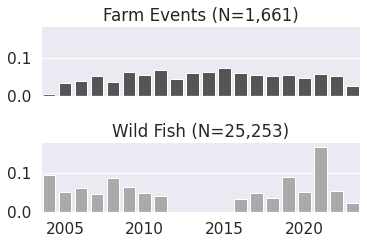

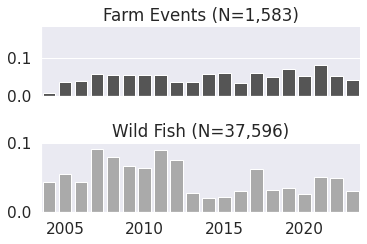

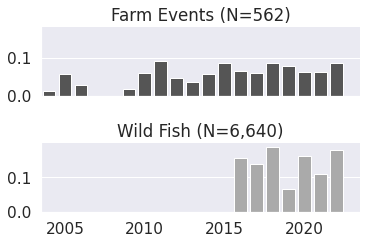

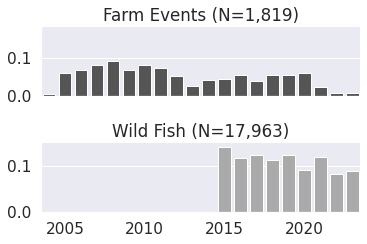

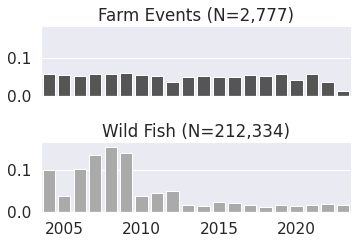

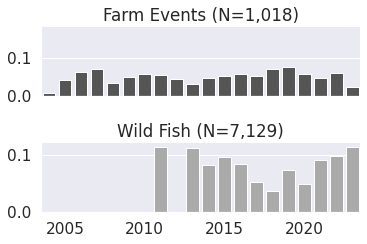

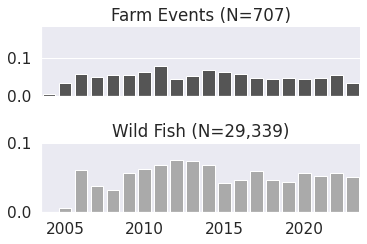

In [167]:
# create them all and save them
for zone_str in chart_df.dfozone.unique():
    zone_chart = chart_zone(zone_str)
    # save the figure
    zone_chart.savefig(chart_output_dirpath / 'zone_{}_panel.png'.format(zone_str))